#**Install Requirement Library**

In [ ]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=f71425f3a603a0234c546c9aa69ee2d79abb3ef3f6fc48a67fc32e119dd7d39b
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [72]:
import pandas as pd

# URLs of the datasets
datasets = [
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956589.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956945.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2957178.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2958436.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2959247.csv"
]

# Define the column names based on the dataset structure
column_names = [
    "Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# List to hold DataFrames
dfs = []

# Read each dataset and append to the list
for dataset in datasets:
    df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)
    dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Replace zeros in the Magnitude and Depth columns with NaN
merged_df['Magnitude'] = merged_df['Magnitude'].replace(0, pd.NA)
merged_df['Depth'] = merged_df['Depth'].replace(0, pd.NA)

# Forward fill NaN values in the Magnitude and Depth columns
merged_df['Magnitude'] = merged_df['Magnitude'].fillna(method='ffill')
merged_df['Depth'] = merged_df['Depth'].fillna(method='ffill')

# Display the first few rows of the original merged dataframe
#print("Original Merged DataFrame:")
#print(merged_df.head(10))

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df = merged_df[
    (merged_df['Latitude'] >= min_lat) &
    (merged_df['Latitude'] <= max_lat) &
    (merged_df['Longitude'] >= min_lon) &
    (merged_df['Longitude'] <= max_lon)
]

# Display the first few rows of the filtered dataframe
#print("Filtered DataFrame:")
#print(filtered_df.head(10))

# Check the min and max of filtered coordinates
#print(f"Min Latitude: {filtered_df['Latitude'].min()}, Max Latitude: {filtered_df['Latitude'].max()}")
#print(f"Min Longitude: {filtered_df['Longitude'].min()}, Max Longitude: {filtered_df['Longitude'].max()}")

merged_df = filtered_df

# Display the first few rows of the final merged dataframe
print("Final Merged DataFrame:")
merged_df.head(10)


<ipython-input-72-b9b09e1801ca>:23: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)


Final Merged DataFrame:


,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst,Gap,Clo,Rms,Source,EventID
1050,24/01/2007,11:30:16,37.4133,-117.0986,6.10,4.09,ML,34,0.0,0.0,106,19,0.15
1051,24/01/2007,13:42:53,40.3115,-124.5853,19.05,4.40,Mw,28,0.0,0.0,232,25,0.08
1633,09/02/2007,03:33:44,33.2113,-116.1480,11.88,4.29,ML,102,0.0,0.0,0.23,CI,10230869.00
2245,26/02/2007,12:19:55,40.6428,-124.8628,-0.53,5.40,Mw,85,0.0,0.0,244,48,0.19
2367,02/03/2007,04:40:01,37.8965,-122.1113,15.98,4.23,Mw,152,0.0,0.0,29,3,0.20
2627,09/03/2007,03:17:32,38.4269,-119.3695,10.12,4.76,ML,42,0.0,0.0,79,10,0.14
3387,30/03/2007,09:09:36,36.0277,-117.7753,-0.66,4.11,ML,37,0.0,0.0,0.38,CI,14282008.00
3994,05/04/2007,22:54:30,40.3112,-124.5840,17.92,4.10,Mw,31,0.0,0.0,230,24,0.10
4123,07/04/2007,23:55:04,40.6032,-124.7713,20.48,4.20,Mw,36,0.0,0.0,241,39,0.14
4463,15/04/2007,22:57:27,32.6923,-116.0565,7.70,4.41,ML,72,0.0,0.0,0.29,CI,14285168.00


In [ ]:
import pandas as pd

# Kolom dataset
column_names = [
    "Date", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# Membaca dataset
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch2962551.txt"
df1 = pd.read_csv(dataset1, delimiter=',', names=column_names, header=None, skiprows=1)

# Memisahkan kolom "Date" menjadi kolom "Date" dan "Time"
df1[['Date', 'Time']] = df1['Date'].str.split(expand=True)

# Mengubah format kolom "Date" menjadi "DD/MM/YYYY"
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')

# Mengubah format kolom "Time" menjadi "HH:MM:SS"
df1['Time'] = df1['Time'].str.split('.').str[0]

# Menyimpan hanya kolom yang diminta
df1 = df1[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df1 = df1[
    (df1['Latitude'] >= min_lat) &
    (df1['Latitude'] <= max_lat) &
    (df1['Longitude'] >= min_lon) &
    (df1['Longitude'] <= max_lon)
]

# Menampilkan 10 baris pertama dari data yang telah difilter
filtered_df1.head(10)
df1 = filtered_df1
df1.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,03/01/2013,21:04:25,36.56367,-121.07066,8.177,3.40,Mw,95
2,08/01/2013,17:43:18,37.42283,-118.32967,5.860,3.19,Md,47
3,11/01/2013,10:46:02,39.78083,-123.56667,8.306,3.31,Mw,33
5,15/01/2013,15:14:30,36.56333,-121.07467,7.967,3.52,Mw,93
6,15/01/2013,15:18:14,36.56317,-121.07417,7.147,3.07,ML,93
7,16/01/2013,11:25:40,35.48867,-118.27817,5.704,3.54,ML,40
8,19/01/2013,21:15:10,38.21100,-117.98400,17.941,3.04,ML,63
9,21/01/2013,01:25:57,34.78483,-119.47550,10.716,3.29,ML,49
10,23/01/2013,06:26:39,35.02017,-123.84267,2.170,3.06,Md,44
11,24/01/2013,08:21:48,38.55900,-119.62033,4.055,3.67,Mw,38


In [75]:
import pandas as pd

# Kolom dataset
column_names = [
    "Date", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# Membaca dataset
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch179919.csv"
df2 = pd.read_csv(dataset2, delimiter=',', names=column_names, header=None, skiprows=1)

# Memisahkan kolom "Date" menjadi kolom "Date" dan "Time"
df2[['Date', 'Time']] = df2['Date'].str.split(expand=True)

# Mengubah format kolom "Date" menjadi "DD/MM/YYYY"
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')

# Mengubah format kolom "Time" menjadi "HH:MM:SS"
df2['Time'] = df2['Time'].str.split('.').str[0]

# Menyimpan hanya kolom yang diminta
df2 = df2[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]

# Definisi batas-batas koordinat geografis
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Filter data berdasarkan batas-batas koordinat geografis
filtered_df2 = df2[
    (df2['Latitude'] >= min_lat) &
    (df2['Latitude'] <= max_lat) &
    (df2['Longitude'] >= min_lon) &
    (df2['Longitude'] <= max_lon)
]

# Menampilkan 10 baris pertama dari data yang telah difilter
filtered_df2.head(10)
df2 = filtered_df2
df2.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,01/01/2022,06:10:48,35.89950,-120.44100,5.65,3.29,ML,65
1,03/01/2022,02:34:48,35.31783,-119.40850,12.05,4.05,ML,72
2,05/01/2022,07:20:55,38.18884,-117.86200,1.48,4.36,Mw,14
3,05/01/2022,07:21:13,38.20917,-117.80133,21.62,4.37,Mw,61
4,06/01/2022,00:28:07,37.33383,-117.90234,9.50,4.75,Mw,70
5,06/01/2022,02:42:10,40.38467,-124.86433,12.57,4.58,Mw,145
6,06/01/2022,04:21:22,38.19450,-117.88834,-1.84,3.62,ML,46
7,07/01/2022,00:56:40,40.47800,-124.32183,18.75,3.03,ML,40
8,07/01/2022,02:32:07,37.33633,-117.90283,8.72,3.01,ML,49
9,08/01/2022,06:21:31,34.43433,-118.99683,-0.76,3.70,ML,33


In [77]:
# Menggabungkan df1 dan df
combined_df = pd.concat([df1, merged_df, df2], ignore_index=True)
combined_df = combined_df[["Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType", "Nst"]]

# Menampilkan 10 baris pertama dari DataFrame gabungan
combined_df.head(10)

,Date,Time,Latitude,Longitude,Depth,Magnitude,MagType,Nst
0,03/01/2013,21:04:25,36.56367,-121.07066,8.177,3.40,Mw,95
1,08/01/2013,17:43:18,37.42283,-118.32967,5.860,3.19,Md,47
2,11/01/2013,10:46:02,39.78083,-123.56667,8.306,3.31,Mw,33
3,15/01/2013,15:14:30,36.56333,-121.07467,7.967,3.52,Mw,93
4,15/01/2013,15:18:14,36.56317,-121.07417,7.147,3.07,ML,93
5,16/01/2013,11:25:40,35.48867,-118.27817,5.704,3.54,ML,40
6,19/01/2013,21:15:10,38.21100,-117.98400,17.941,3.04,ML,63
7,21/01/2013,01:25:57,34.78483,-119.47550,10.716,3.29,ML,49
8,23/01/2013,06:26:39,35.02017,-123.84267,2.170,3.06,Md,44
9,24/01/2013,08:21:48,38.55900,-119.62033,4.055,3.67,Mw,38


#**Feature Description**

In [78]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5273 non-null   object 
 1   Time       5273 non-null   object 
 2   Latitude   5273 non-null   float64
 3   Longitude  5273 non-null   float64
 4   Depth      5273 non-null   float64
 5   Magnitude  5273 non-null   float64
 6   MagType    5273 non-null   object 
 7   Nst        5273 non-null   object 
dtypes: float64(4), object(4)
memory usage: 329.7+ KB


In [79]:
data = combined_df[['Magnitude', 'Depth']]
data.describe()

,Magnitude,Depth
count,5273.000000,5273.000000
mean,3.966035,8.409475
std,0.637221,14.349350
min,3.000000,-2.340000
25%,3.370000,3.510000
50%,4.050000,6.407000
75%,4.320000,10.410000
max,7.300000,503.400000


# **Univariate analysis**

<ipython-input-80-4ead62bdfed3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


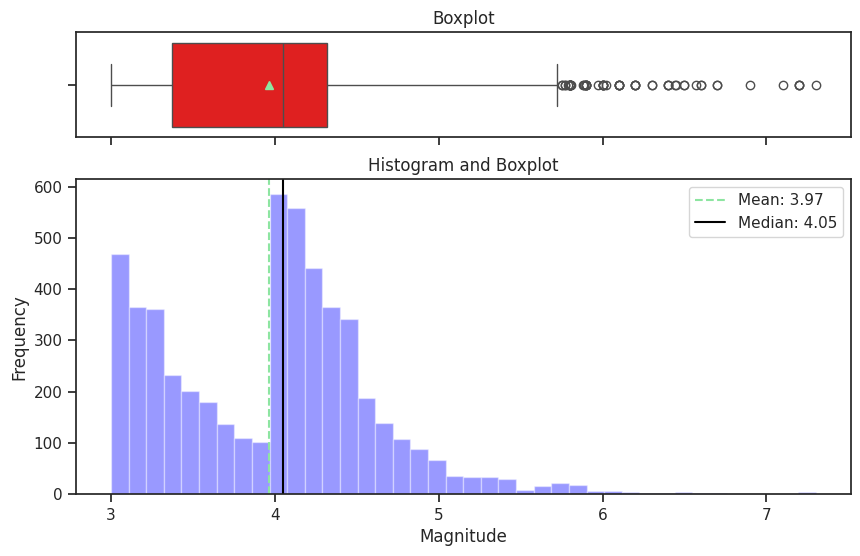

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 6))

    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red', orient='h')
    sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')

    mean_val = np.mean(mycol)
    median_val = np.median(mycol)

    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='black', linestyle='-', label=f'Median: {median_val:.2f}')

    ax_hist.legend()

    ax_box.set(ylabel='')
    ax_hist.set(title='Histogram and Boxplot', xlabel='Magnitude', ylabel='Frequency')
    ax_box.set_title('Boxplot', fontsize=12)

    plt.show()

# Apply the function to the earthquake magnitude data
hist_box(combined_df.Magnitude)

<ipython-input-80-4ead62bdfed3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


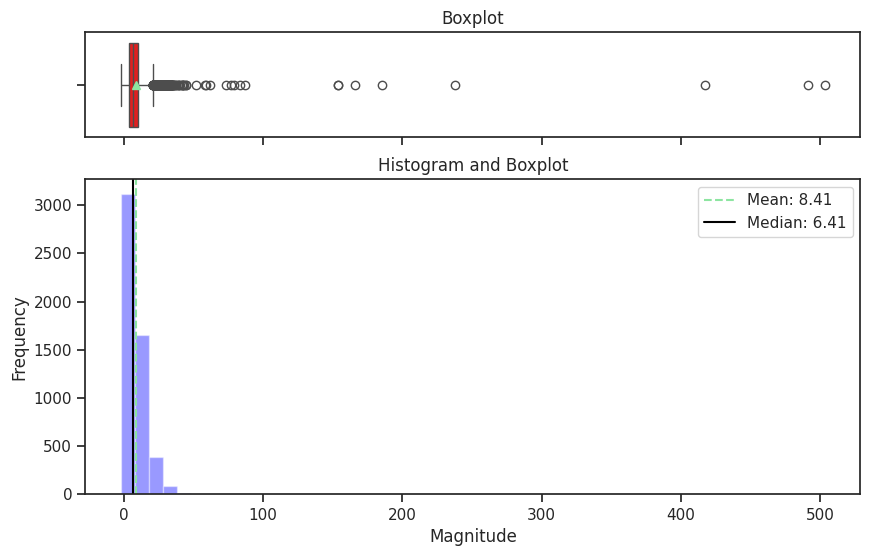

In [81]:
hist_box(combined_df.Depth)

# **Categorical variables**

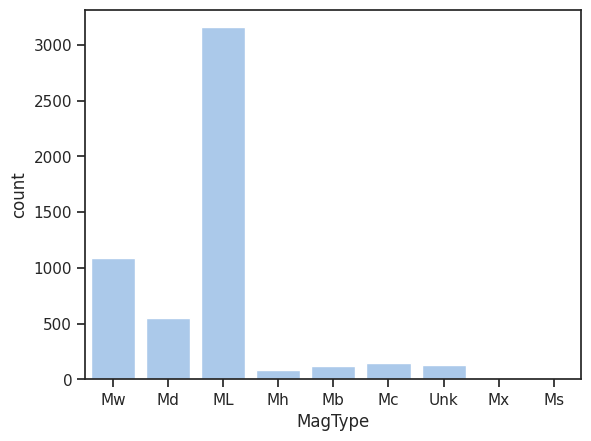

In [83]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='MagType', data=combined_df)
plt.show()

# **Multi-variate Analysis**

In [84]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.
fit_num = combined_df.select_dtypes(include='float64')
fit_num.head()

,Latitude,Longitude,Depth,Magnitude
0,36.56367,-121.07066,8.177,3.40
1,37.42283,-118.32967,5.860,3.19
2,39.78083,-123.56667,8.306,3.31
3,36.56333,-121.07467,7.967,3.52
4,36.56317,-121.07417,7.147,3.07


In [85]:
corr = fit_num.corr()
corr

,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,-0.652836,0.131088,-0.256580
Longitude,-0.652836,1.000000,-0.116160,0.162827
Depth,0.131088,-0.116160,1.000000,0.093434
Magnitude,-0.256580,0.162827,0.093434,1.000000


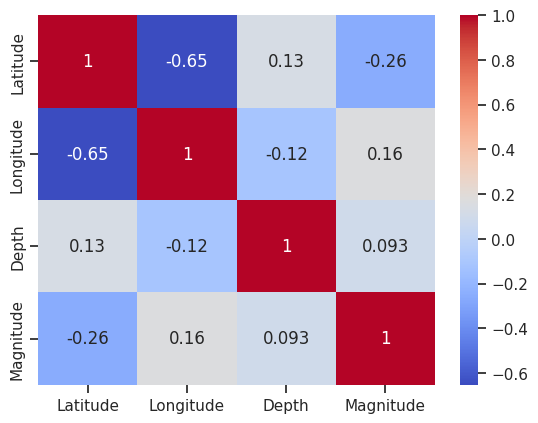

In [86]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

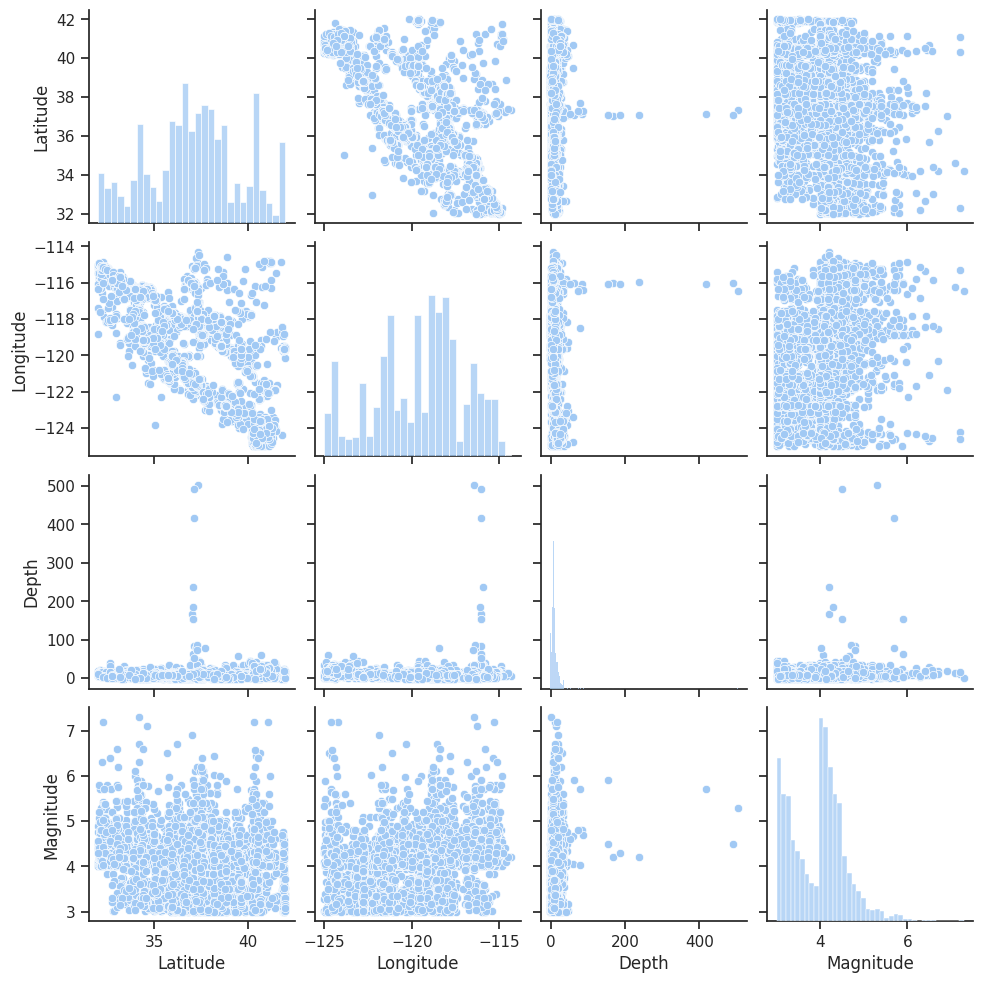

In [87]:
# Looking at relations between the numerical variables
sns.pairplot(combined_df)

# **Statistical Description**

In [88]:
# Menggabungkan df1 dan df
#combined_df = pd.concat([df1, df, df2], ignore_index=True)
#combined_df = combined_df[["Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType", "Nst"]]

# Menampilkan 10 baris pertama dari DataFrame gabungan
#combined_df.head(10)

# Menampilkan beberapa baris pertama dari 'Date' dan 'Time'
#print(combined_df[['Date', 'Time']].head())

# Memastikan 'Date' dan 'Time' tidak memiliki nilai kosong atau tidak sesuai format
combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='%d/%m/%Y', errors='coerce')
combined_df['Time'] = pd.to_datetime(combined_df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Menggabungkan kolom 'Date' dan 'Time' menjadi kolom 'DateTime'
combined_df['DateTime'] = pd.to_datetime(combined_df['Date'].astype(str) + ' ' + combined_df['Time'].astype(str), errors='coerce')

# Menampilkan beberapa baris pertama dari dataframe yang digabungkan termasuk 'DateTime'
combined_df[['Date', 'Time', 'DateTime']].head()

,Date,Time,DateTime
0,2013-01-03,21:04:25,2013-01-03 21:04:25
1,2013-01-08,17:43:18,2013-01-08 17:43:18
2,2013-01-11,10:46:02,2013-01-11 10:46:02
3,2013-01-15,15:14:30,2013-01-15 15:14:30
4,2013-01-15,15:18:14,2013-01-15 15:18:14


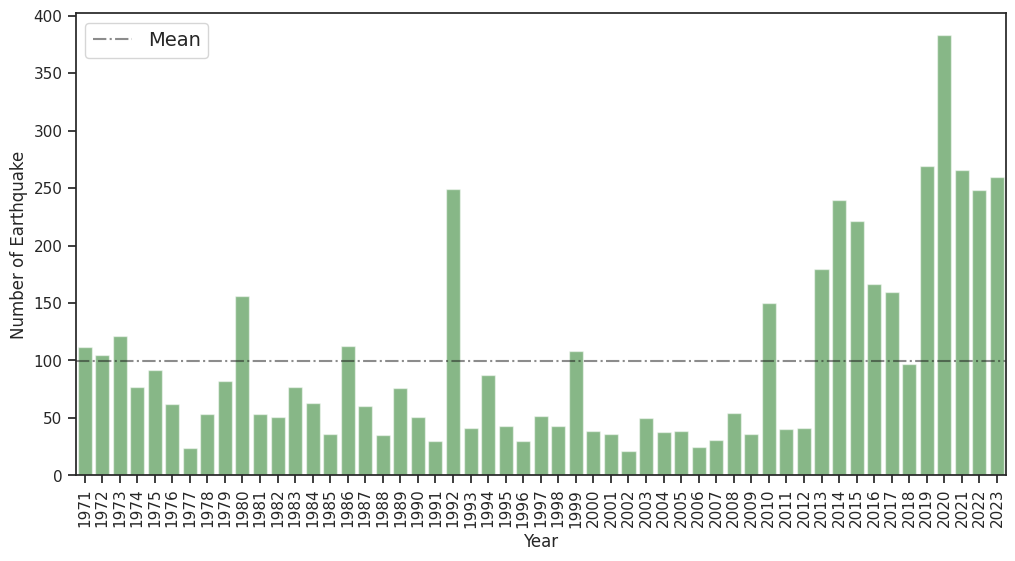

Average number of earthquakes per year: 99.49056603773585
Average number of earthquakes per day of year: 14.407103825136613
Average number of earthquakes per month: 439.4166666666667


In [89]:
# Drop rows where 'DateTime' could not be parsed
combined_df.dropna(subset=['DateTime'], inplace=True)

# Extract year, month, and day
combined_df['year'] = combined_df['DateTime'].dt.year
combined_df['month'] = combined_df['DateTime'].dt.month
combined_df['day'] = combined_df['DateTime'].dt.day
combined_df['dofy'] = combined_df['DateTime'].dt.strftime("%j").astype(int)

# Calculate the number of earthquake events per year, month, and day
year_tot = combined_df['year'].value_counts().sort_index()
month_tot = combined_df['month'].value_counts().sort_index()
day_tot = combined_df['day'].value_counts().sort_index()
dofy_tot = combined_df['dofy'].value_counts().sort_index()

# Calculate the average number of earthquake events per time (DMY)
year_ave = year_tot.mean()
month_ave = month_tot.mean()
day_ave = day_tot.mean()
dofy_ave = dofy_tot.mean()

# Plotting
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.', alpha=0.5, label='Mean')
plt.xlabel('Year')
plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Display the first few rows of the filtered dataframe
combined_df.head(10)

# Display the averages
print(f'Average number of earthquakes per year: {year_ave}')
print(f'Average number of earthquakes per day of year: {dofy_ave}')
print(f'Average number of earthquakes per month: {month_ave}')


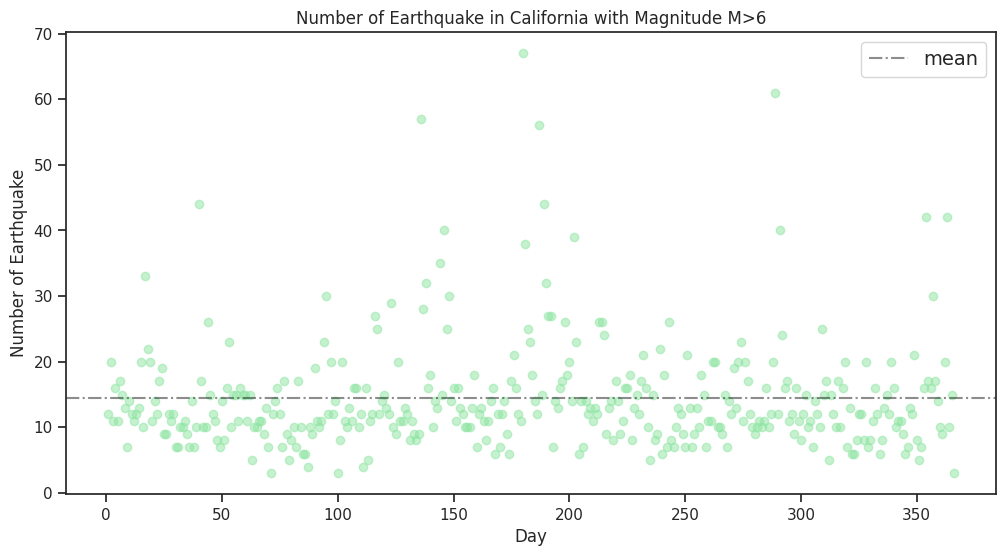

In [90]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in California with Magnitude M>6')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

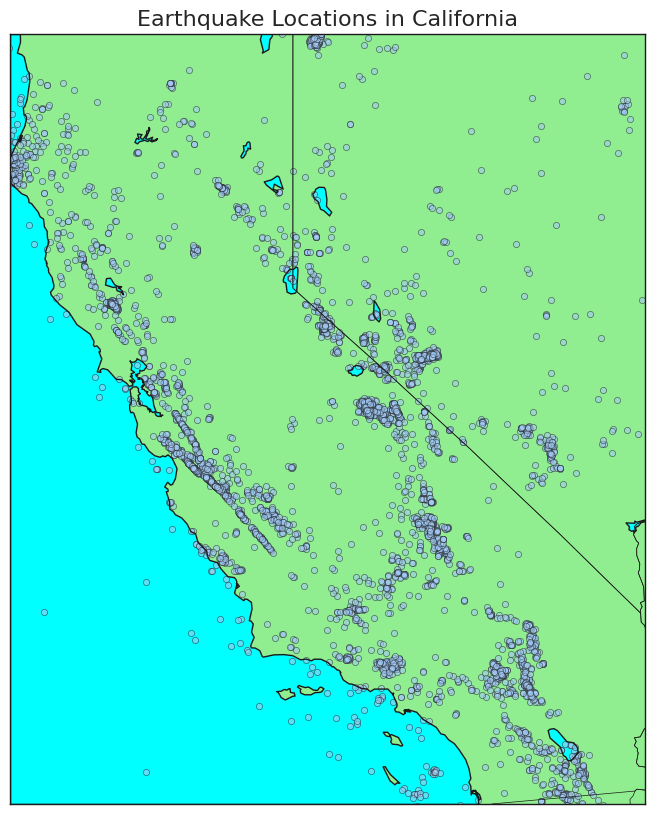

In [91]:
# Drop baris yang memiliki nilai kosong (NaN) pada kolom latitude dan longitude
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Menentukan batas wilayah geografis berdasarkan data gempa bumi
min_lat = 32.55
max_lat = 41.99
min_lon = -124.37
max_lon = -114.56

# Mencari pusat wilayah data gempa bumi
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Membuat peta dengan Basemap
plt.figure(figsize=(15, 10))
m = Basemap(projection='merc',
            llcrnrlat=min_lat, urcrnrlat=max_lat,
            llcrnrlon=min_lon, urcrnrlon=max_lon,
            lat_ts=center_lat, lon_0=center_lon, resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Menambahkan marker untuk setiap gempa bumi pada peta
x, y = m(combined_df['Longitude'].values, combined_df['Latitude'].values)
m.scatter(x, y, s=20, alpha=0.6, edgecolor='k', linewidth=0.5)

# Menambahkan judul
plt.title('Earthquake Locations in California', fontsize=16)

# Menampilkan plot
plt.show()


<ipython-input-98-fb3e4c4608c0>:24: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)


Final Merged DataFrame:
           Date      Time  Latitude  Longitude  Depth Magnitude MagType  Nst  \
1050 2007-01-24  11:30:16   37.4133  -117.0986   6.10      4.09      ML   34   
1051 2007-01-24  13:42:53   40.3115  -124.5853  19.05       4.4      Mw   28   
1633 2007-02-09  03:33:44   33.2113  -116.1480  11.88      4.29      ML  102   
2245 2007-02-26  12:19:55   40.6428  -124.8628  -0.53       5.4      Mw   85   
2367 2007-03-02  04:40:01   37.8965  -122.1113  15.98      4.23      Mw  152   
2627 2007-03-09  03:17:32   38.4269  -119.3695  10.12      4.76      ML   42   
3387 2007-03-30  09:09:36   36.0277  -117.7753  -0.66      4.11      ML   37   
3994 2007-04-05  22:54:30   40.3112  -124.5840  17.92       4.1      Mw   31   
4123 2007-04-07  23:55:04   40.6032  -124.7713  20.48       4.2      Mw   36   
4463 2007-04-15  22:57:27   32.6923  -116.0565   7.70      4.41      ML   72   

      Gap  Clo   Rms Source      EventID  
1050  0.0  0.0   106     19         0.15  
1051  0.0

<ipython-input-98-fb3e4c4608c0>:99: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
<ipython-input-98-fb3e4c4608c0>:104: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


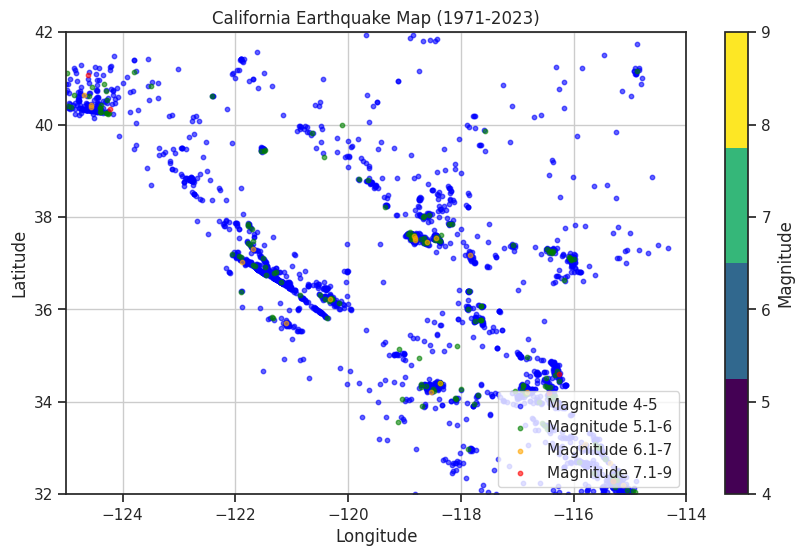

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs of the datasets
datasets = [
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956589.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956945.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2957178.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2958436.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2959247.csv"
]

# Define the column names based on the dataset structure
column_names = [
    "Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# List to hold DataFrames
dfs = []

# Read each dataset and append to the list
for dataset in datasets:
    df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)
    dfs.append(df)

# Second dataset
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch2962551.txt"
df1 = pd.read_csv(dataset1, delimiter=',', names=column_names, header=None, skiprows=1)
df1[['Date', 'Time']] = df1['Date'].str.split(expand=True)
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')
df1['Time'] = df1['Time'].str.split('.').str[0]
df1 = df1[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df1)

# Third dataset
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch179919.csv"
df2 = pd.read_csv(dataset2, delimiter=',', names=column_names, header=None, skiprows=1)
df2[['Date', 'Time']] = df2['Date'].str.split(expand=True)
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')
df2['Time'] = df2['Time'].str.split('.').str[0]
df2 = df2[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df2)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Replace zeros in the Magnitude and Depth columns with NaN
combined_df['Magnitude'] = combined_df['Magnitude'].replace(0, pd.NA)
combined_df['Depth'] = combined_df['Depth'].replace(0, pd.NA)

# Forward fill NaN values in the Magnitude and Depth columns
combined_df['Magnitude'] = combined_df['Magnitude'].fillna(method='ffill')
combined_df['Depth'] = combined_df['Depth'].fillna(method='ffill')

# Convert 'Date' column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce', format='%d/%m/%Y')

# Drop rows with NaN values in Latitude and Longitude columns
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filter data for the date range 1971 - 2023
combined_df = combined_df[(combined_df['Date'] >= '1971-01-01') & (combined_df['Date'] <= '2023-12-31')]

# Filter data based on geographic boundaries
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

combined_df = combined_df[
    (combined_df['Latitude'] >= min_lat) &
    (combined_df['Latitude'] <= max_lat) &
    (combined_df['Longitude'] >= min_lon) &
    (combined_df['Longitude'] <= max_lon)
]

# Check the final dataset
print("Final Merged DataFrame:")
print(combined_df.head(10))
print(f"Date Range in the Dataset: {combined_df['Date'].min()} - {combined_df['Date'].max()}")

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Create Map
plt.figure(figsize=(10, 6))
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = combined_df[(combined_df['Magnitude'] >= min_mag) & (combined_df['Magnitude'] <= max_mag)]
    plt.scatter(mag_data['Longitude'], mag_data['Latitude'], s=10, alpha=0.6, c=color, label=label)

# Add Legend
plt.legend(loc='lower right')

# Added vertical colorbar for magnitude description
cmap = plt.cm.get_cmap('viridis', len(magnitude_ranges))
norm = plt.Normalize(vmin=4, vmax=9)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Magnitude')

# Add Label and Title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Earthquake Map (1971-2023)')

# Set limits based on provided region boundaries
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

# Display Map
plt.grid(True)
plt.show()


#**Frequency**

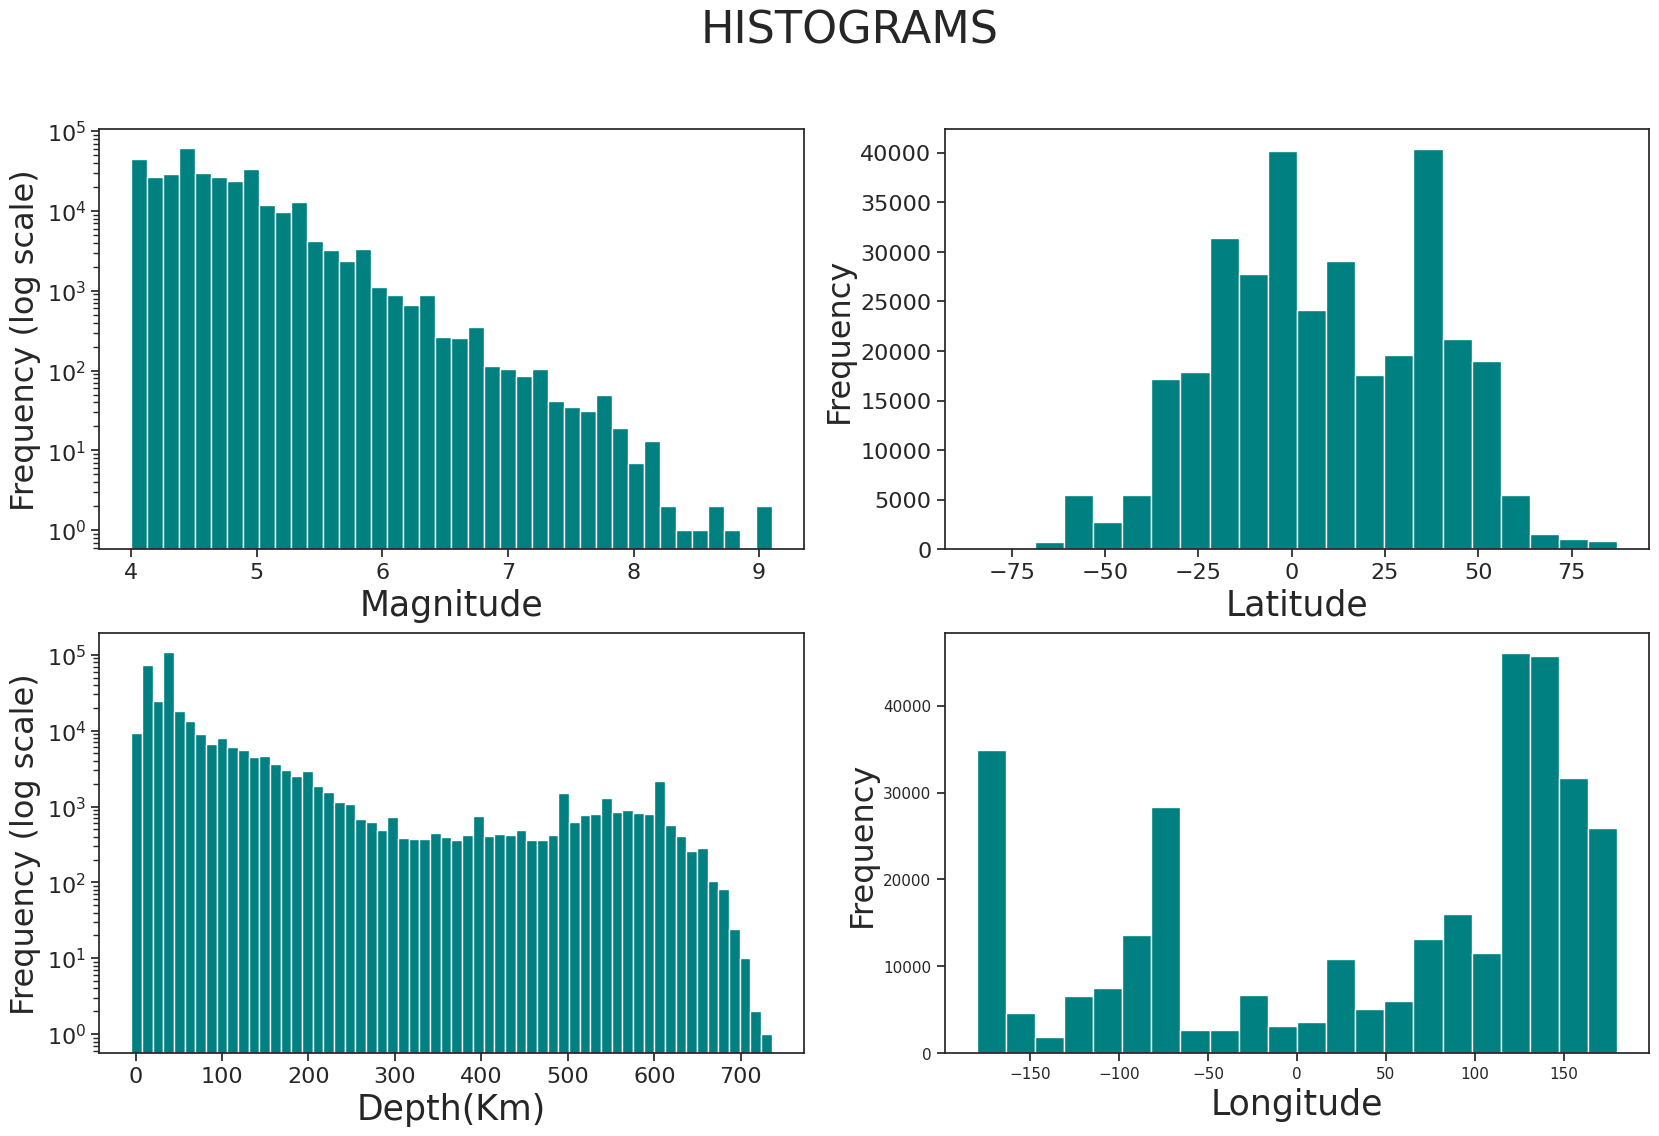

In [93]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(combined_df['Magnitude'],bins=40,color='teal')
axes[1][0].hist(combined_df['Depth'],bins=60,color='teal')
axes[0][1].hist(combined_df['Latitude'],bins=22,color='teal')
axes[1][1].hist(combined_df['Longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


## **Depth, Latitude**

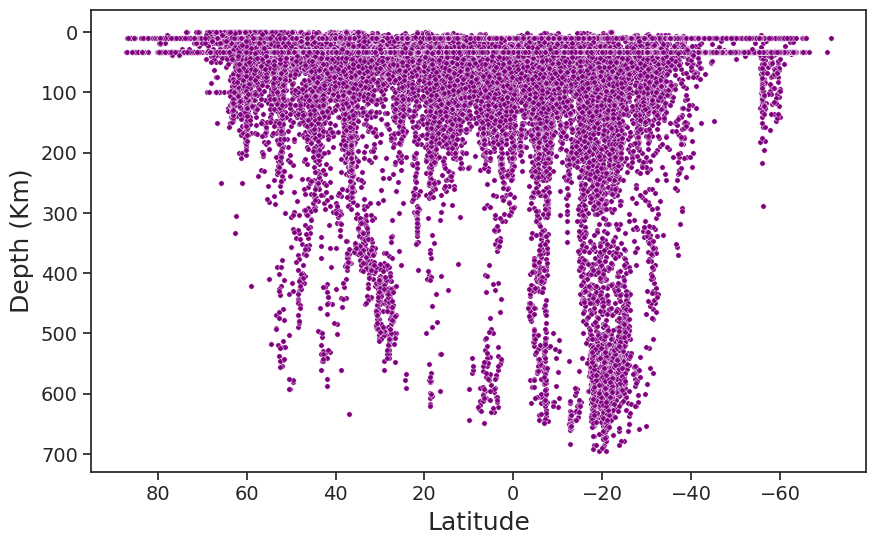

In [94]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['Latitude'],y=df['Depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Longitude**

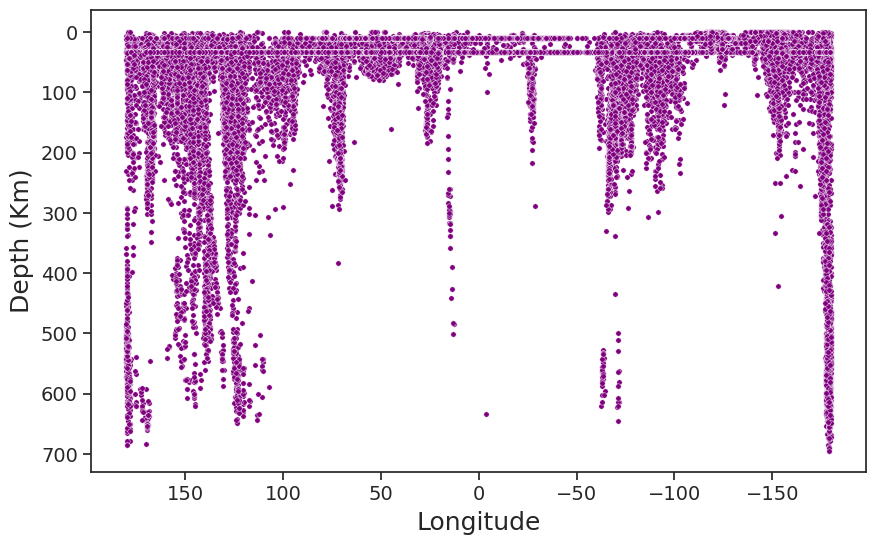

In [95]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['Longitude'],y=df['Depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

<ipython-input-99-540848c6129f>:24: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)


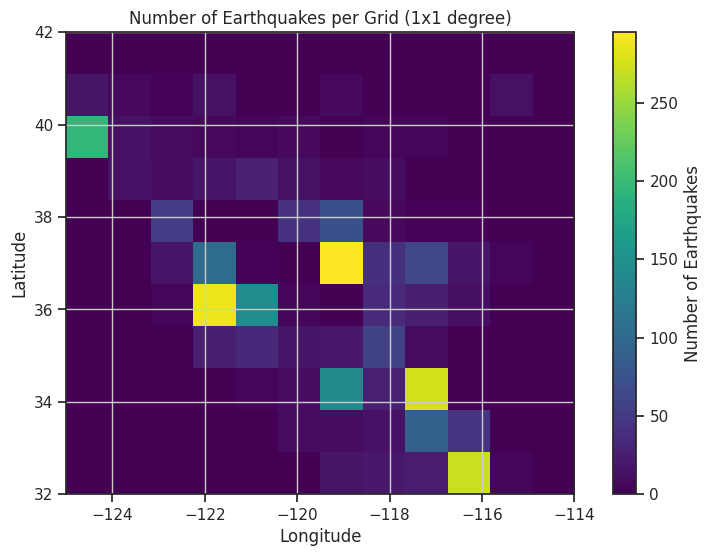

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs of the datasets
datasets = [
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956589.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956945.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2957178.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2958436.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2959247.csv"
]

# Define the column names based on the dataset structure
column_names = [
    "Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# List to hold DataFrames
dfs = []

# Read each dataset and append to the list
for dataset in datasets:
    df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)
    dfs.append(df)

# Second dataset
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch2962551.txt"
df1 = pd.read_csv(dataset1, delimiter=',', names=column_names, header=None, skiprows=1)
df1[['Date', 'Time']] = df1['Date'].str.split(expand=True)
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')
df1['Time'] = df1['Time'].str.split('.').str[0]
df1 = df1[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df1)

# Third dataset
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch179919.csv"
df2 = pd.read_csv(dataset2, delimiter=',', names=column_names, header=None, skiprows=1)
df2[['Date', 'Time']] = df2['Date'].str.split(expand=True)
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')
df2['Time'] = df2['Time'].str.split('.').str[0]
df2 = df2[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df2)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Replace zeros in the Magnitude and Depth columns with NaN
combined_df['Magnitude'] = combined_df['Magnitude'].replace(0, pd.NA)
combined_df['Depth'] = combined_df['Depth'].replace(0, pd.NA)

# Forward fill NaN values in the Magnitude and Depth columns
combined_df['Magnitude'] = combined_df['Magnitude'].fillna(method='ffill')
combined_df['Depth'] = combined_df['Depth'].fillna(method='ffill')

# Convert 'Date' column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce', format='%d/%m/%Y')

# Drop rows with NaN values in Latitude and Longitude columns
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filter data for the date range 1971 - 2023
combined_df = combined_df[(combined_df['Date'] >= '1971-01-01') & (combined_df['Date'] <= '2023-12-31')]

# Filter data based on geographic boundaries
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

combined_df = combined_df[
    (combined_df['Latitude'] >= min_lat) &
    (combined_df['Latitude'] <= max_lat) &
    (combined_df['Longitude'] >= min_lon) &
    (combined_df['Longitude'] <= max_lon)
]

# Drop rows with NaN values in Latitude and Longitude columns
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Tentukan batas wilayah geografis berdasarkan data gempa bumi
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Hitung jumlah grid yang diperlukan
num_lat_grids = int(max_lat - min_lat) + 1
num_lon_grids = int(max_lon - min_lon) + 1

# Inisialisasi tabel untuk menghitung jumlah gempa di setiap grid
grid_counts = pd.DataFrame(index=range(num_lat_grids), columns=range(num_lon_grids), data=0)

# Fungsi untuk menentukan grid dari suatu titik
def get_grid(latitude, longitude):
    lat_index = int(latitude - min_lat)
    lon_index = int(longitude - min_lon)
    return lat_index, lon_index

# Hitung jumlah gempa di setiap grid
for index, row in combined_df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    lat_index, lon_index = get_grid(lat, lon)
    if 0 <= lat_index < num_lat_grids and 0 <= lon_index < num_lon_grids:  # Pastikan indeks dalam batas
        grid_counts.at[lat_index, lon_index] += 1

# Menyajikan juga dalam bentuk heatmap untuk visualisasi
plt.figure(figsize=(10, 6))
plt.imshow(grid_counts.values, cmap='viridis', origin='lower', extent=[min_lon, max_lon, min_lat, max_lat])
plt.colorbar(label='Number of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of Earthquakes per Grid (1x1 degree)')
plt.grid(True)
plt.show()


<ipython-input-100-5ff2284e6400>:24: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)


Grid Counts (1x1 degree):
    -125  -124  -123  -122  -121  -120  -119  -118  -117  -116  -115  -114
32     0     0     0     0     0     0    16    20    22   271     5     0
33     0     0     0     0     0     9    10    14    90    46     0     0
34     0     0     0     2     5    10   141    26   276     0     0     0
35     0     0     0    25    34    18    20    58     9     0     0     0
36     0     0     4   288   143     5     2    36    25    12     0     0
37     0     0    17   104     3     1   295    40    63    18     5     0
38     0     1    51     2     0    42    72     7     3     3     1     0
39     1    14    10    17    27    13     6    10     2     2     0     0
40   195    14     9     6     4     7     0     5     5     1     2     0
41    15     7     3    13     0     1     7     0     1     2    13     0
42     0     0     0     0     0     0     0     0     0     0     0     0


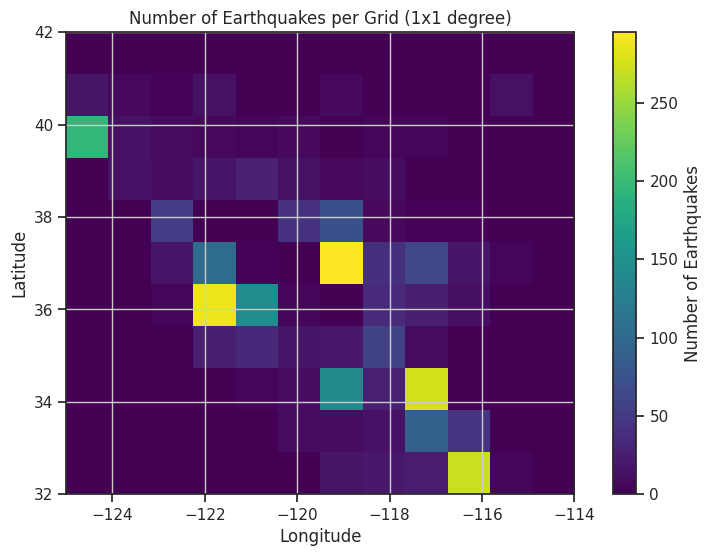

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs of the datasets
datasets = [
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956589.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2956945.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2957178.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2958436.csv",
    "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/catsearch2959247.csv"
]

# Define the column names based on the dataset structure
column_names = [
    "Date", "Time", "Latitude", "Longitude", "Depth", "Magnitude", "MagType",
    "Nst", "Gap", "Clo", "Rms", "Source", "EventID"
]

# List to hold DataFrames
dfs = []

# Read each dataset and append to the list
for dataset in datasets:
    df = pd.read_csv(dataset, delimiter=';', header=None, names=column_names, skiprows=1)
    dfs.append(df)

# Second dataset
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch2962551.txt"
df1 = pd.read_csv(dataset1, delimiter=',', names=column_names, header=None, skiprows=1)
df1[['Date', 'Time']] = df1['Date'].str.split(expand=True)
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%d/%m/%Y')
df1['Time'] = df1['Time'].str.split('.').str[0]
df1 = df1[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df1)

# Third dataset
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/ncedc/dbsearch179919.csv"
df2 = pd.read_csv(dataset2, delimiter=',', names=column_names, header=None, skiprows=1)
df2[['Date', 'Time']] = df2['Date'].str.split(expand=True)
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%d/%m/%Y')
df2['Time'] = df2['Time'].str.split('.').str[0]
df2 = df2[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'MagType', 'Nst']]
dfs.append(df2)

# Concatenate all DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Replace zeros in the Magnitude and Depth columns with NaN
combined_df['Magnitude'] = combined_df['Magnitude'].replace(0, pd.NA)
combined_df['Depth'] = combined_df['Depth'].replace(0, pd.NA)

# Forward fill NaN values in the Magnitude and Depth columns
combined_df['Magnitude'] = combined_df['Magnitude'].fillna(method='ffill')
combined_df['Depth'] = combined_df['Depth'].fillna(method='ffill')

# Convert 'Date' column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors='coerce', format='%d/%m/%Y')

# Drop rows with NaN values in Latitude and Longitude columns
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Filter data for the date range 1971 - 2023
combined_df = combined_df[(combined_df['Date'] >= '1971-01-01') & (combined_df['Date'] <= '2023-12-31')]

# Filter data based on geographic boundaries
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

combined_df = combined_df[
    (combined_df['Latitude'] >= min_lat) &
    (combined_df['Latitude'] <= max_lat) &
    (combined_df['Longitude'] >= min_lon) &
    (combined_df['Longitude'] <= max_lon)
]

# Drop rows with NaN values in Latitude and Longitude columns
combined_df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Tentukan batas wilayah geografis berdasarkan data gempa bumi
min_lat = 32.0
max_lat = 42.0
min_lon = -125.0
max_lon = -114.0

# Hitung jumlah grid yang diperlukan
num_lat_grids = int(max_lat - min_lat) + 1
num_lon_grids = int(max_lon - min_lon) + 1

# Inisialisasi tabel untuk menghitung jumlah gempa di setiap grid
grid_counts = [[0] * num_lon_grids for _ in range(num_lat_grids)]

# Fungsi untuk menentukan grid dari suatu titik
def get_grid(latitude, longitude):
    lat_index = int(latitude - min_lat)
    lon_index = int(longitude - min_lon)
    return lat_index, lon_index

# Mengisi grid_counts dengan jumlah gempa di setiap grid
for index, row in combined_df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    lat_index, lon_index = get_grid(lat, lon)
    if 0 <= lat_index < num_lat_grids and 0 <= lon_index < num_lon_grids:
        grid_counts[lat_index][lon_index] += 1

# Membuat DataFrame dari tabel jumlah gempa
grid_counts_df = pd.DataFrame(grid_counts, columns=range(int(min_lon), int(max_lon) + 1), index=range(int(min_lat), int(max_lat) + 1))

# Menampilkan tabel
print("Grid Counts (1x1 degree):")
print(grid_counts_df)

# Menyajikan juga dalam bentuk heatmap untuk visualisasi
plt.figure(figsize=(10, 6))
plt.imshow(grid_counts_df.values, cmap='viridis', origin='lower', extent=[min_lon, max_lon, min_lat, max_lat])
plt.colorbar(label='Number of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of Earthquakes per Grid (1x1 degree)')
plt.grid(True)
plt.show()
